In [226]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


If a woman with diabetes keeps her blood sugar well controlled before and during pregnancy, she can increase her chances of having a healthy baby. Controlling blood sugar also reduces the chance that a woman will develop common problems of diabetes, or that the problems will get worse during pregnancy.

In [227]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [228]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [230]:
pd.crosstab(df.Outcome,df.Age)

Age,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,72,81
Outcome,,,,,,,,,,,,,,,,,,,,,
0,58,61,31,38,34,25,24,25,16,15,...,4,1,3,2,2,1,2,0,1,1
1,5,11,7,8,14,8,8,10,13,6,...,0,0,0,2,1,0,0,1,0,0


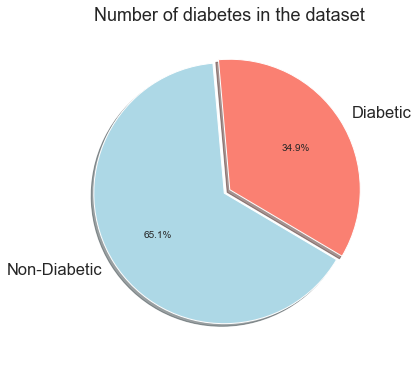

In [231]:
#sns.set(style="whitegrid")
labels = ['Non-Diabetic', 'Diabetic']
sizes = df['Outcome'].value_counts(sort = True)

colors = ["lightblue","salmon"]
explode = (0.05,0)     #explode is space between divison of pie chart
 
plt.figure(figsize=(7,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=95,)

plt.title('Number of diabetes in the dataset')
plt.show()


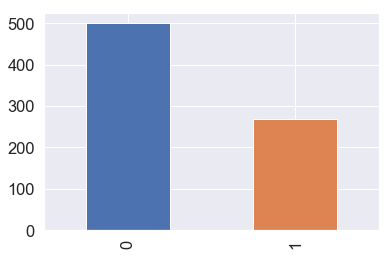

In [232]:
df['Outcome'].value_counts().plot(kind='bar')

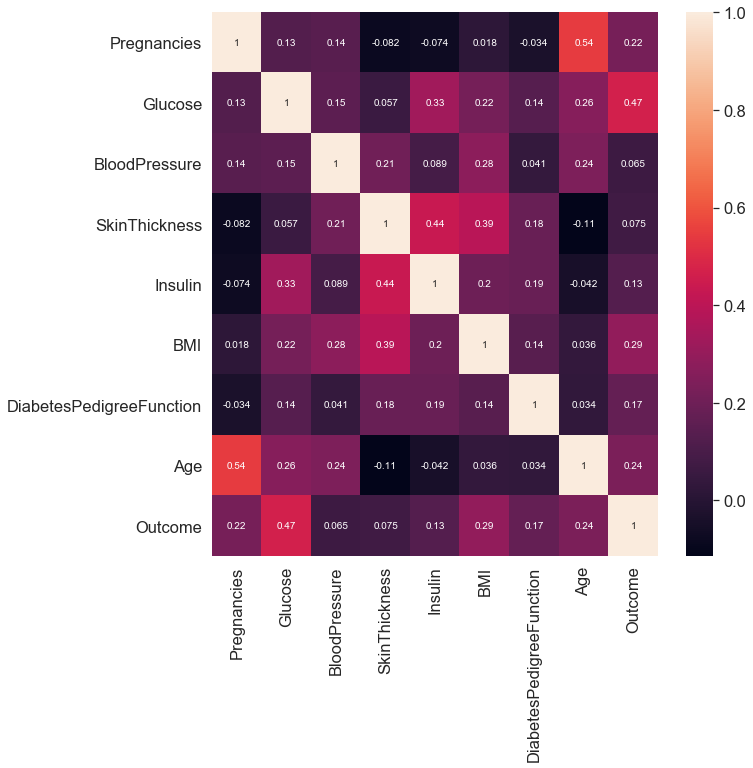

In [233]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True,)
plt.show()

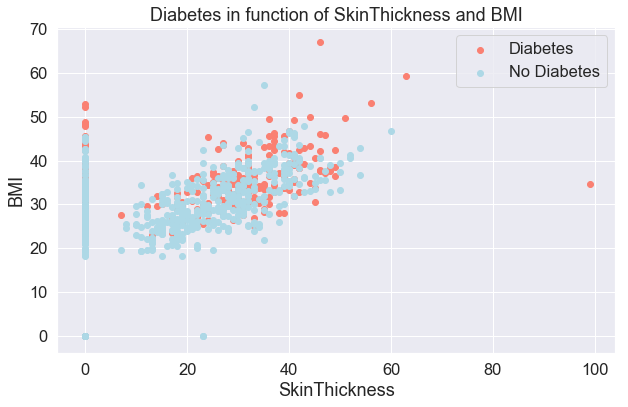

In [234]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.SkinThickness[df.Outcome==1], 
            df.BMI[df.Outcome==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.SkinThickness[df.Outcome==0], 
            df.BMI[df.Outcome==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes in function of SkinThickness and BMI")
plt.xlabel("SkinThickness")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("BMI");

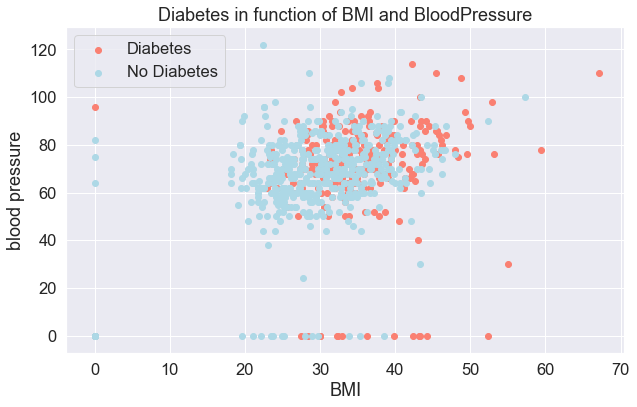

In [235]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.BMI[df.Outcome==1], 
            df.BloodPressure[df.Outcome==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.BMI[df.Outcome==0], 
            df.BloodPressure[df.Outcome==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes in function of BMI and BloodPressure")
plt.xlabel("BMI")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("blood pressure");

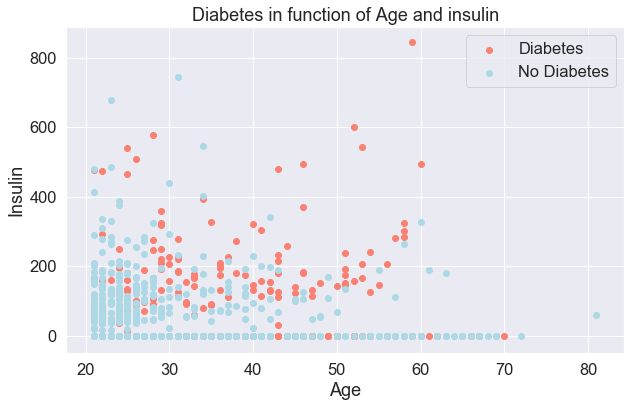

In [236]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.Age[df.Outcome==1], 
            df.Insulin[df.Outcome==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.Age[df.Outcome==0], 
            df.Insulin[df.Outcome==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes in function of Age and insulin")
plt.xlabel("Age")
plt.legend(["Diabetes", "No Diabetes"])
plt.ylabel("Insulin");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D02461A630>,
      dtype=object)

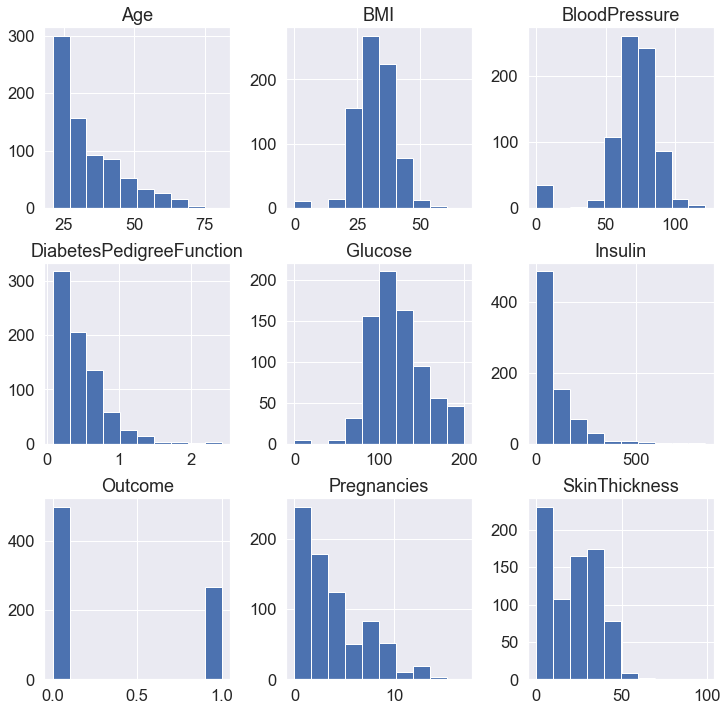

In [237]:

df.hist(figsize=(12,12))

In [238]:
# box plot

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\Sachi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Sachi\Anaconda

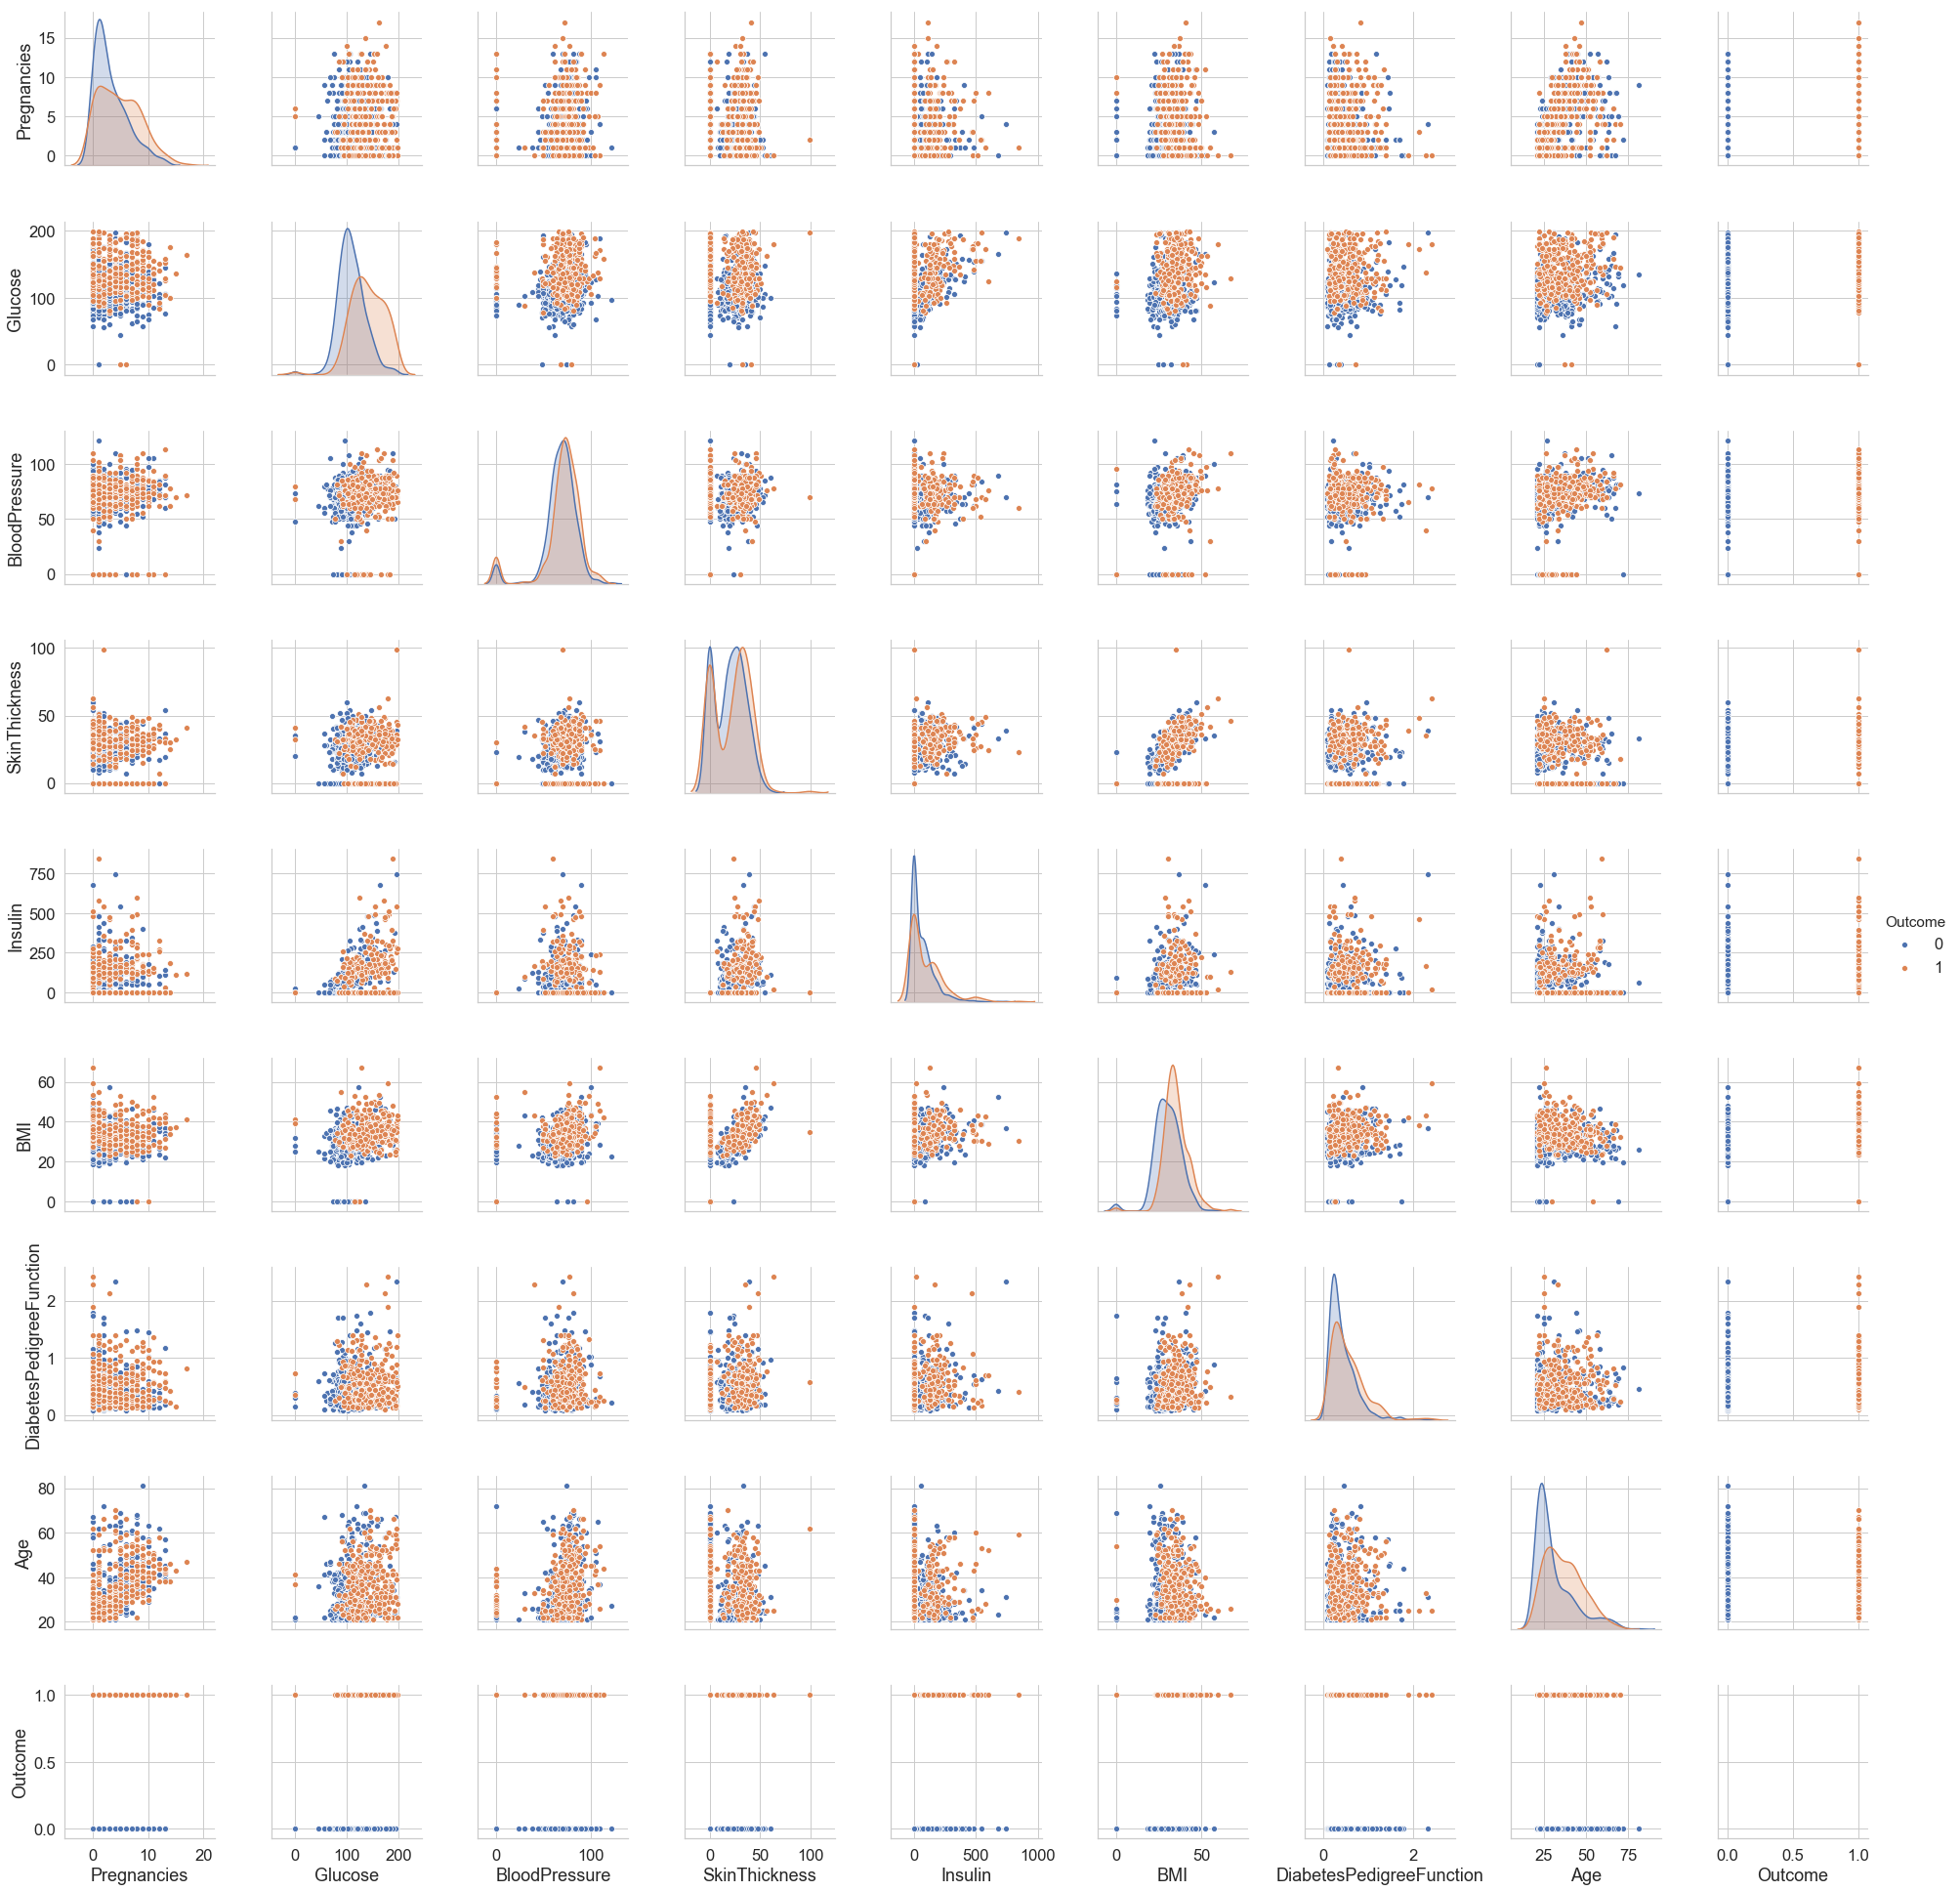

In [239]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Outcome" , size=3);
plt.show();

## or
#
#sns.pairplot(data=df,hue='Outcome',diag_kind='kde')
#plt.show()


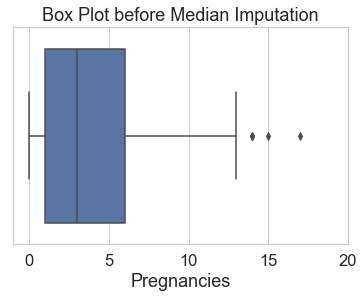

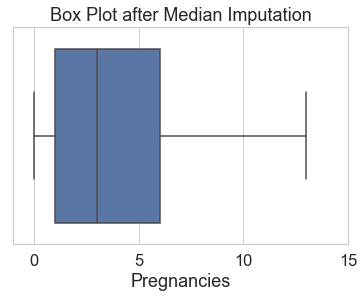

In [240]:

sns.boxplot(x= df.Pregnancies)
plt.xlim([-1,20])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.Pregnancies.quantile(0.25)
q3 = df.Pregnancies.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.Pregnancies)
for i in df.Pregnancies:
    if i > Upper_tail or i < Lower_tail:
            df.Pregnancies = df.Pregnancies.replace(i, med)
sns.boxplot(x= df.Pregnancies)
plt.xlim([-1,15])
plt.title("Box Plot after Median Imputation")
plt.show()   

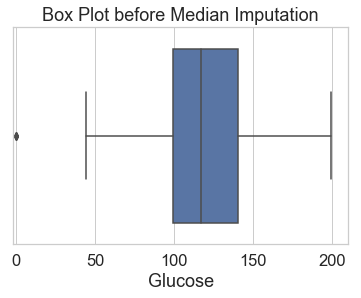

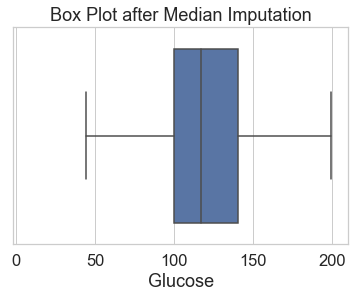

In [241]:

sns.boxplot(x= df.Glucose)
plt.xlim([-2,210])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.Glucose.quantile(0.25)
q3 = df.Glucose.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.Glucose)
for i in df.Glucose:
    if i > Upper_tail or i < Lower_tail:
            df.Glucose = df.Glucose.replace(i, med)
sns.boxplot(x= df.Glucose)
plt.xlim([-2,210])
plt.title("Box Plot after Median Imputation")
plt.show()   

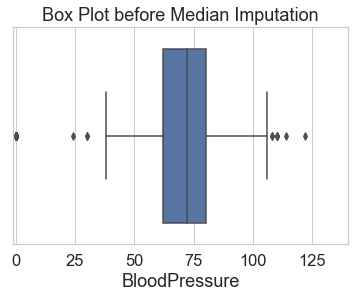

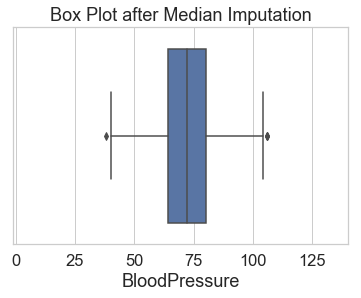

In [242]:

sns.boxplot(x= df.BloodPressure)
plt.xlim([-1,140])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.BloodPressure.quantile(0.25)
q3 = df.BloodPressure.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.BloodPressure)
for i in df.BloodPressure:
    if i > Upper_tail or i < Lower_tail:
            df.BloodPressure = df.BloodPressure.replace(i, med)
sns.boxplot(x= df.BloodPressure)
plt.xlim([-1,140])
plt.title("Box Plot after Median Imputation")
plt.show()   

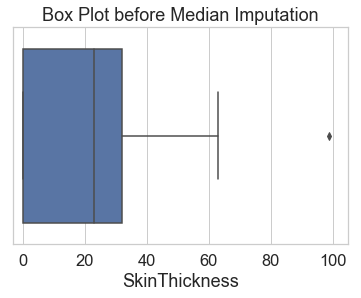

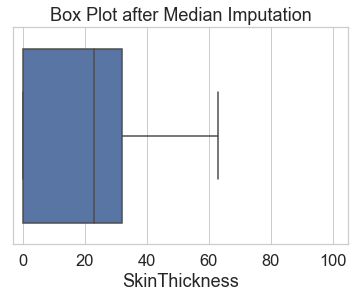

In [243]:

sns.boxplot(x= df.SkinThickness)
plt.xlim([-3,105])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.SkinThickness.quantile(0.25)
q3 = df.SkinThickness.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.SkinThickness)
for i in df.SkinThickness:
    if i > Upper_tail or i < Lower_tail:
            df.SkinThickness = df.SkinThickness.replace(i, med)
sns.boxplot(x= df.SkinThickness)
plt.xlim([-3,105])
plt.title("Box Plot after Median Imputation")
plt.show()   

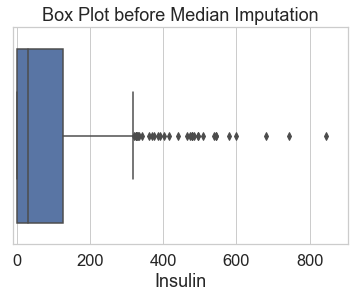

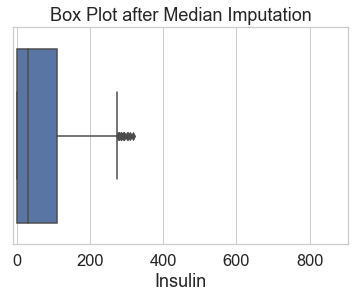

In [244]:

sns.boxplot(x= df.Insulin)
plt.xlim([-10,905])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.Insulin.quantile(0.25)
q3 = df.Insulin.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.Insulin)
for i in df.Insulin:
    if i > Upper_tail or i < Lower_tail:
            df.Insulin = df.Insulin.replace(i, med)
sns.boxplot(x= df.Insulin)
plt.xlim([-10,905])
plt.title("Box Plot after Median Imputation")
plt.show()   

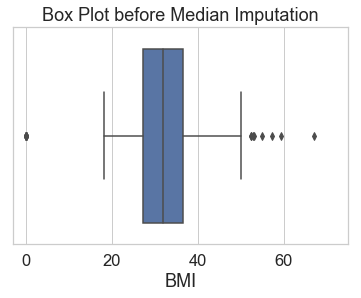

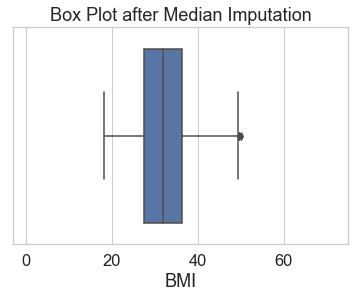

In [245]:

sns.boxplot(x= df.BMI)
plt.xlim([-3,75])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.BMI.quantile(0.25)
q3 = df.BMI.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.BMI)
for i in df.BMI:
    if i > Upper_tail or i < Lower_tail:
            df.BMI = df.BMI.replace(i, med)
sns.boxplot(x= df.BMI)
plt.xlim([-3,75])
plt.title("Box Plot after Median Imputation")
plt.show()

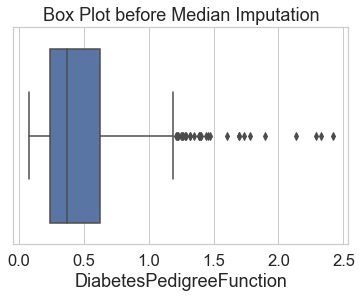

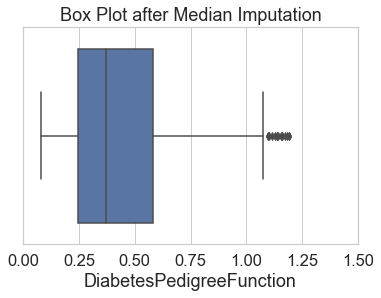

In [246]:

sns.boxplot(x= df.DiabetesPedigreeFunction)
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.DiabetesPedigreeFunction.quantile(0.25)
q3 = df.DiabetesPedigreeFunction.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.DiabetesPedigreeFunction)
for i in df.DiabetesPedigreeFunction:
    if i > Upper_tail or i < Lower_tail:
            df.DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.replace(i, med)
sns.boxplot(x= df.DiabetesPedigreeFunction)
plt.xlim([0,1.5])
plt.title("Box Plot after Median Imputation")
plt.show()   


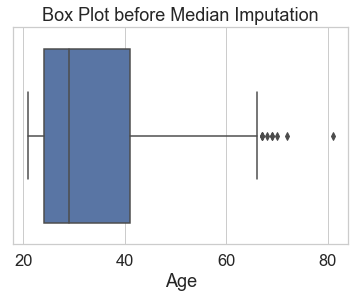

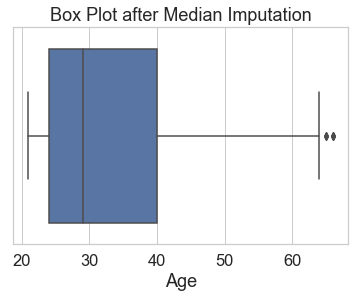

In [247]:

sns.boxplot(x= df.Age)
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df.Age)
for i in df.Age:
    if i > Upper_tail or i < Lower_tail:
            df.Age = df.Age.replace(i, med)
sns.boxplot(x= df.Age)
plt.title("Box Plot after Median Imputation")
plt.show()   


C:\Users\Sachi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Sachi\Anaconda

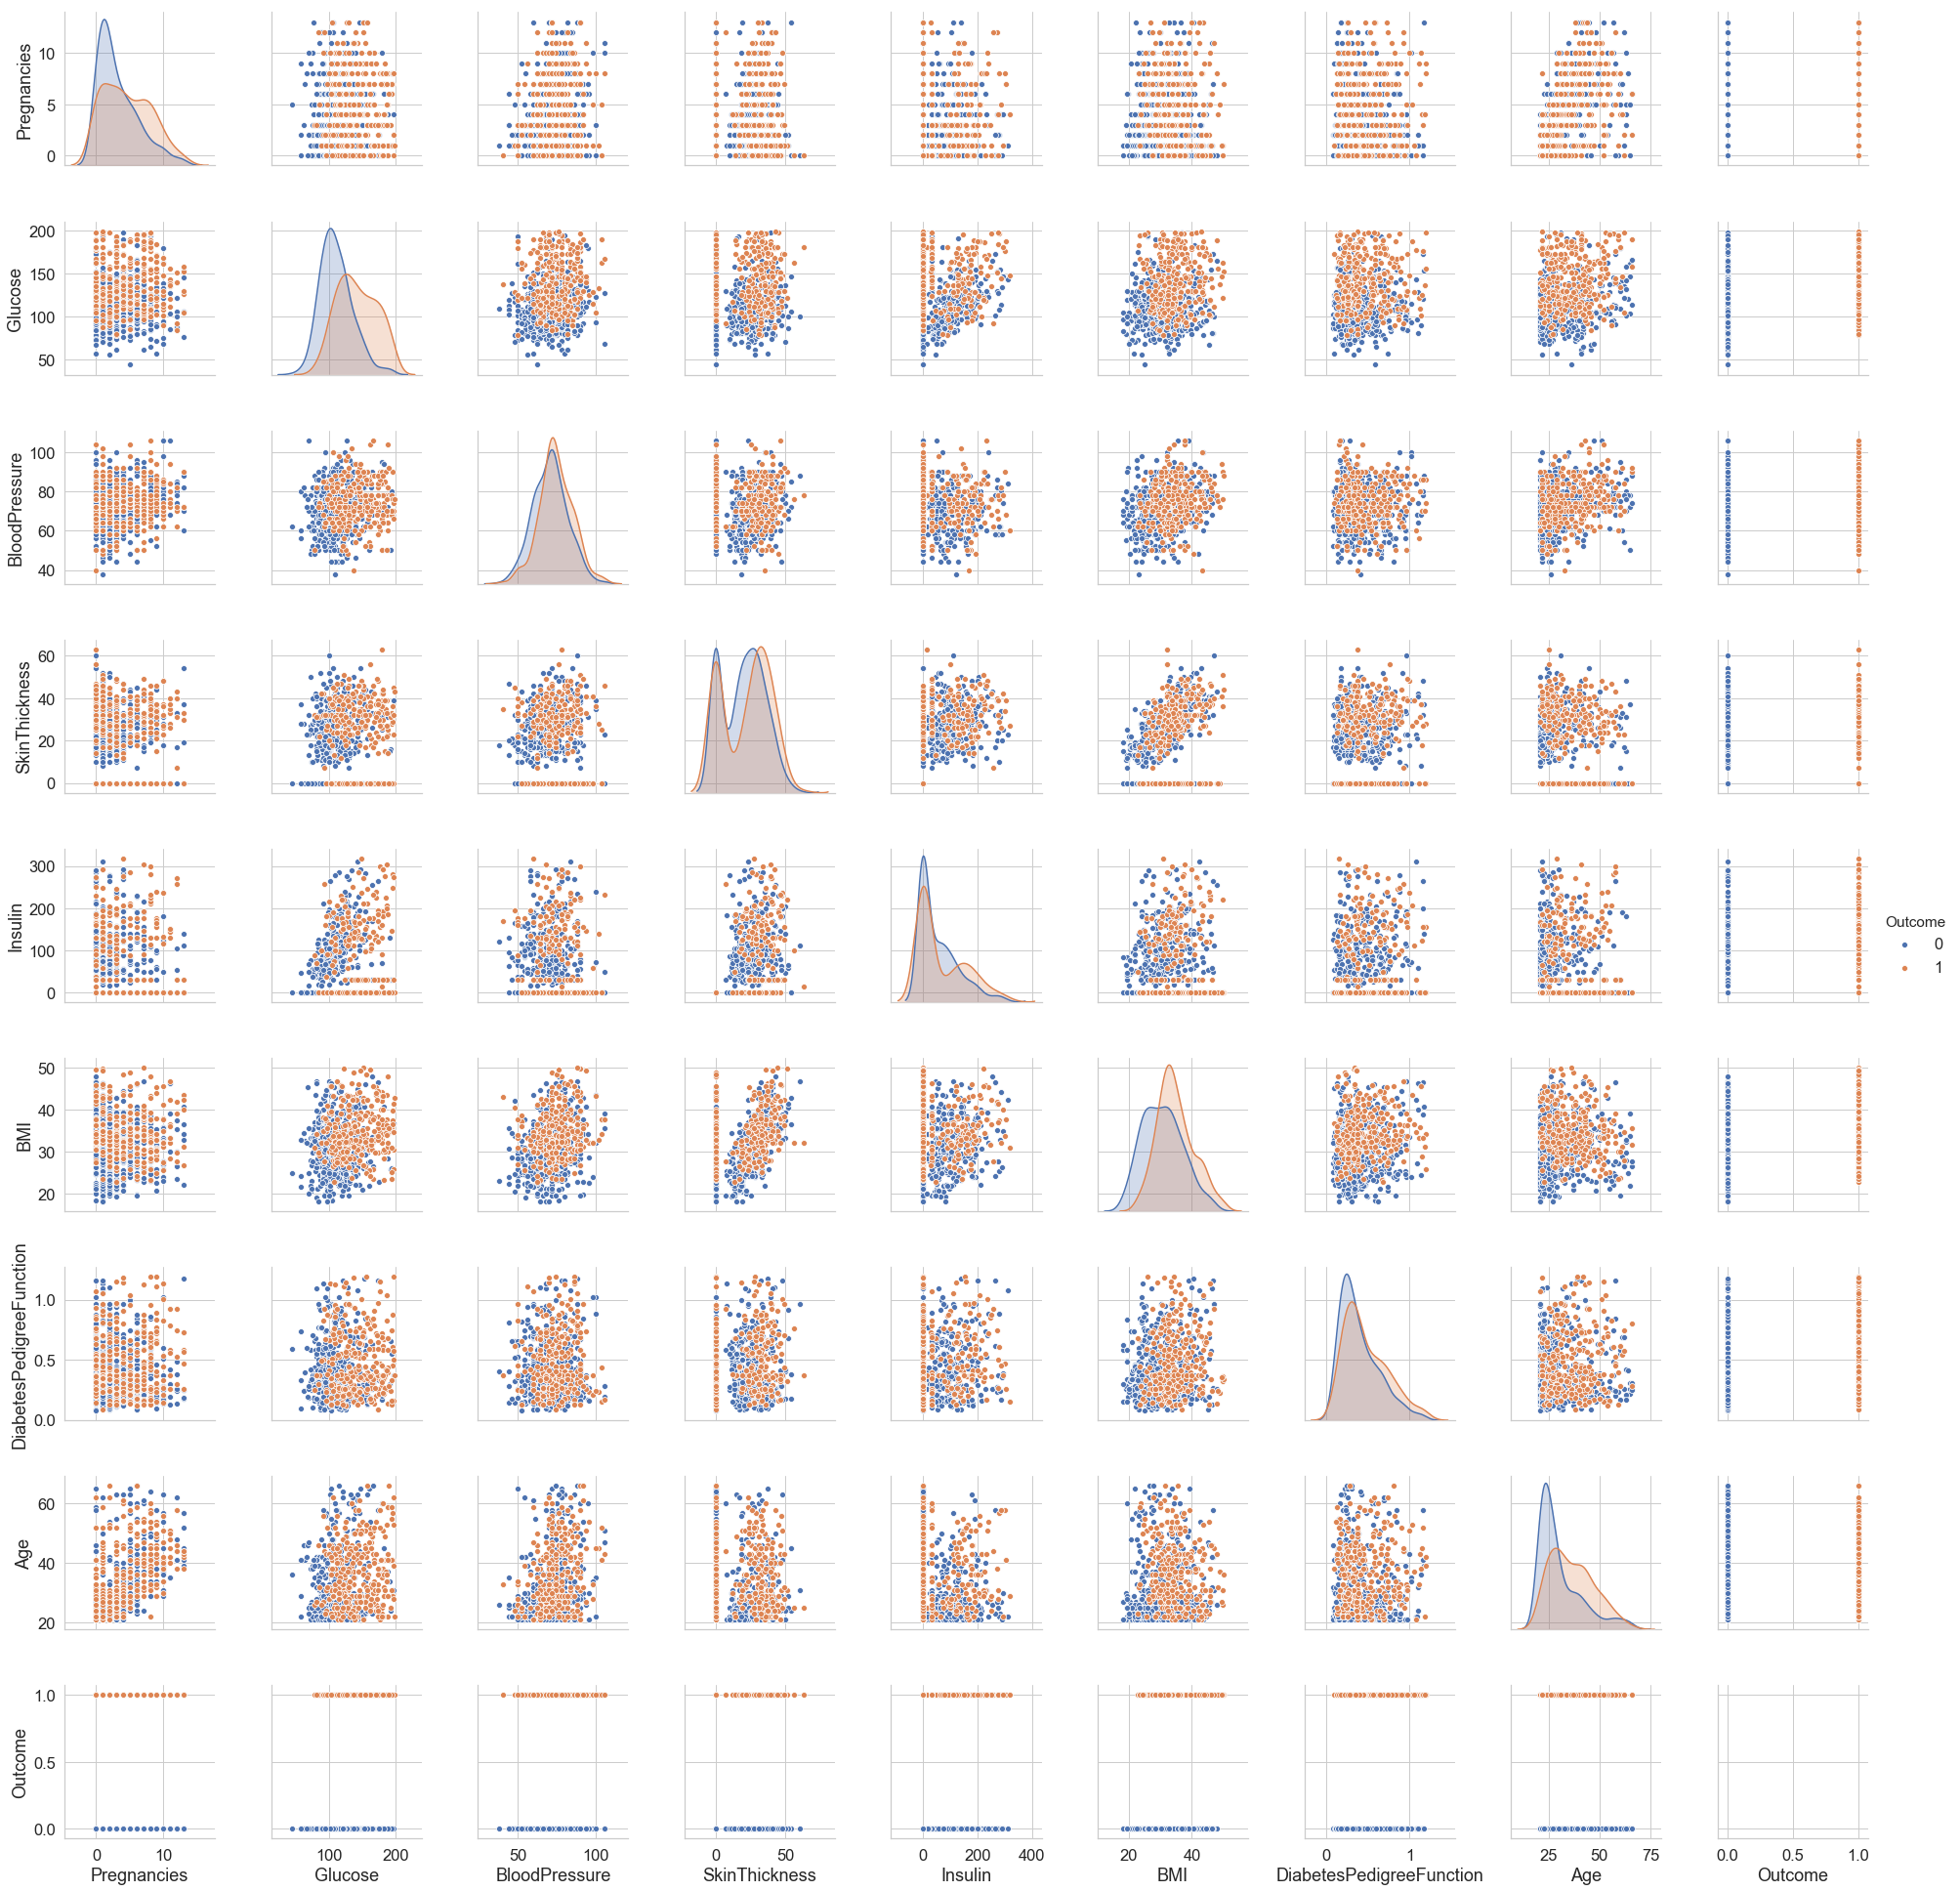

In [248]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Outcome" , size=3);
plt.show();

In [249]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.6270,50,1
1,1,85,66,29,0.0,26.6,0.3510,31,0
2,8,183,64,0,0.0,23.3,0.6720,32,1
3,1,89,66,23,94.0,28.1,0.1670,21,0
4,0,137,40,35,168.0,43.1,0.3725,33,1


In [250]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [251]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0.0,33.6,0.6270,50
1,1,85,66,29,0.0,26.6,0.3510,31
2,8,183,64,0,0.0,23.3,0.6720,32
3,1,89,66,23,94.0,28.1,0.1670,21
4,0,137,40,35,168.0,43.1,0.3725,33


In [252]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [253]:
X.shape,X_train.shape,X_test.shape

((768, 8), (614, 8), (154, 8))

In [254]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
            "XGboost  ": XGBClassifier(objective='binary:logistic'),
             "svc": SVC()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [255]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Sachi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sachi\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'KNN': 0.6428571428571429,
 'Logistic Regression': 0.7532467532467533,
 'Random Forest': 0.7467532467532467,
 'XGboost  ': 0.7077922077922078,
 'svc': 0.7402597402597403}

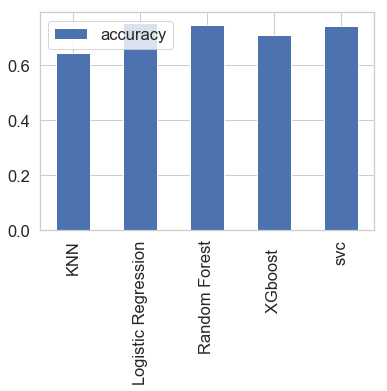

In [256]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [257]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [258]:
train_scores

[1.0,
 0.8469055374592834,
 0.8583061889250815,
 0.8208469055374593,
 0.8175895765472313,
 0.7915309446254072,
 0.8061889250814332,
 0.7833876221498371,
 0.7996742671009772,
 0.7768729641693811,
 0.7801302931596091,
 0.7719869706840391,
 0.7850162866449512,
 0.7703583061889251,
 0.7736156351791531,
 0.7719869706840391,
 0.7817589576547231,
 0.7736156351791531,
 0.7719869706840391,
 0.7833876221498371]

Maximum KNN score on the test data: 77.27%


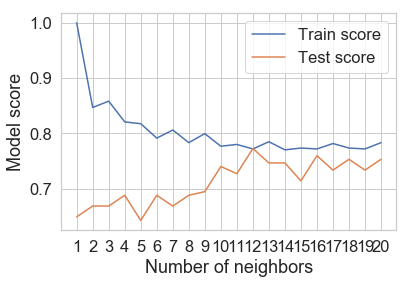

In [259]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [260]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [261]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [262]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [263]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [264]:
rs_rf.best_params_  

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [265]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.7402597402597403

In [266]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [267]:
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [268]:
gs_log_reg.score(X_test, y_test)

0.7532467532467533

In [269]:
y_preds = gs_log_reg.predict(X_test)

In [216]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [222]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

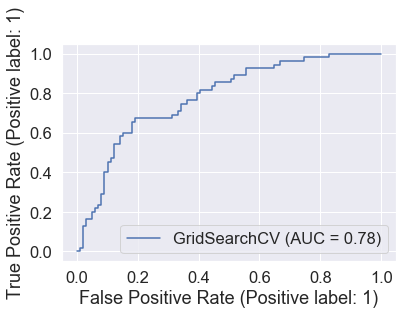

In [217]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [218]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[80 19]
 [19 36]]


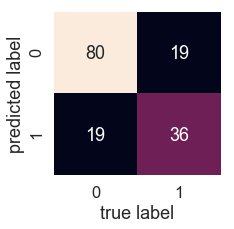

In [219]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [271]:
import pickle 

#saving our model 
pickle.dump(gs_log_reg,open("Diabetic pred logistic  ","wb"))